In [1]:
import sys
sys.path.append("../../gempy/")

import gempy as gp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### data import

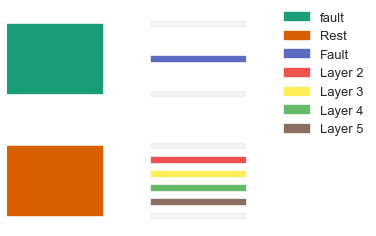

In [2]:
# initialize geo_data object
geo_data = gp.create_data([0, 3000, 0, 20, 0, 2000],
                          resolution=[100, 3, 67])
# import csv files with data
geo_data.import_data_csv("../input_data/exp1_data_interf", "../input_data/exp1_data_fol")
# set formation numbers
geo_data.set_formation_number()
# set series order, formation order
gp.set_series(geo_data, {"fault":geo_data.get_formations()[np.where(geo_data.get_formations()=="Fault")[0][0]], 
                         "Rest":np.delete(geo_data.get_formations(), np.where(geo_data.get_formations()=="Fault")[0][0])},
                           order_series = ["fault", "Rest"], verbose=0, order_formations=['Fault', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])

### compile

In [9]:
interp_data = gp.InterpolatorInput(geo_data, u_grade=[0,3], dtype="float32")

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32


### db import

In [10]:
gpost = gp.UncertaintyAnalysisPYMC2.Posterior("C:/Users/Alex/Downloads/exp1_id_2_BI_9_combined_topo", topology=True)

No GemPy model trace tallied.


In [11]:
gpost.compute_entropy(interp_data)

"No models stored in self.lb, please run 'self.compute_posterior_models_all' to generate block models for all iterations."

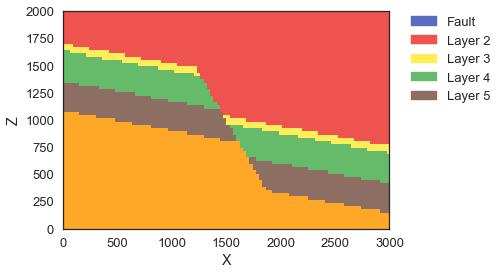

In [12]:
lb, fb = gpost.compute_posterior_model(interp_data, 500)
gp.plot_section(geo_data, lb[0], 0)

In [13]:
from ipywidgets import interact, IntSlider, fixed

def f(i, topo=False):
    lb, fb = gpost.compute_posterior_model(interp_data, i)
    gp.plot_section(geo_data, lb[0], 0)
    if topo:
        gp.topology_plot(geo_data, gpost.topo_graphs[i], gpost.topo_centroids[i])
    plt.show()

# Fault angle doesn't update!

In [14]:
interact(f, topo=False, i=IntSlider(min=0, max=gpost.n_iter - 1, step=1, value=gpost.n_iter / 2))

<function __main__.f>

### count edge

In [22]:
gpost.check_adjacency_freq(1, 7)

870

In [27]:
len(G.adj.keys())

10

In [28]:
def count_graph_nodes(graphs):
    count_dict = {}
    for g in graphs:
        c = len(g.adj.keys())
        if c in count_dict.keys():
            count_dict[c] += 1
        else:
            count_dict[c] = 1
            
    return count_dict

In [29]:
count_graph_nodes(gpost.topo_graphs)

{10: 1245, 11: 709, 12: 42, 14: 1, 31: 1, 40: 1, 41: 1}